In [1]:
import numpy as np
from figures import tree_structure_replay_demo as fig_1
from figures import chain_propagation_demo as fig_s_1
from figures import self_excitation_bistability as fig_s_2
from figures import threshold_potential_analysis as fig_s_3
%matplotlib inline

Here we show how sequential replay can arise in a continuous-time dynamical system, namely a rate-based model network, strictly through tuning a standard parameter set and connectivity structure. In this network each node $i$ has a voltage $v^i \in (-\infty, \infty)$ and a firing rate $r^i \in (0, 1)$, related through

$$r^i = logistic(g(v^i - v_{th}))$$

where $v_{th}$ is the "threshold" for firing, and $g$ is a gain term.

The full dynamical system is given by:

$$\tau \cfrac{dv}{dt} = -(\mathbf{v} - v_{rest}) + W\mathbf{r} + I_{in}(t) + \epsilon(t)$$

where $\tau$ is the time constant, $v_{rest}$ is the resting potential, $W$ is the weight matrix, $I_{in}(t)$ is the time-dependent input, and $\epsilon(t)$ is Gaussian white noise.

In the following, all activation-based excitability changes arise strictly through recurrent connectivity.

### A standard network has very little capacity for sequential replay

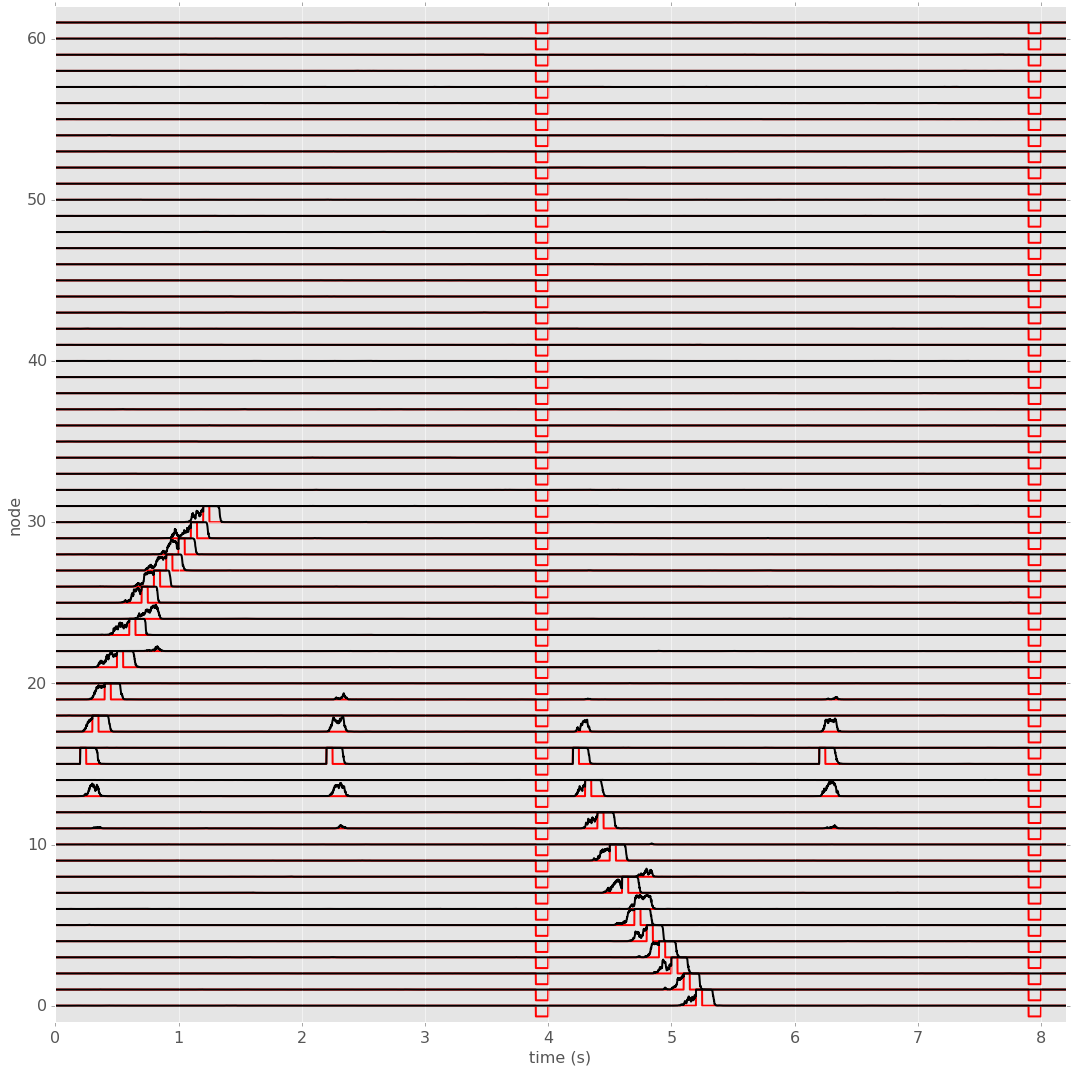

In [2]:
fig_1(
    SEED=0,  # RNG seed
    TAU=0.03,  # time constant (s)
    V_REST=-0.07,  # resting potential (V)
    V_TH=0.0,  # threshold potential (V)
    GAIN=100,  # gain term (1/V)
    NOISE=0.06,  # noise (V)
    DT=0.001,  # integration time constant (s)
    BRANCH_LENGTH=5,  # number of 
    W_PP=0.08,
    W_MP=0,
    W_PM=0,
    W_MM=0,
    DRIVE_START=0.2,
    PULSE_DURATION=0.05,
    INTER_PULSE_INTERVAL=0.1,
    PULSE_HEIGHT=1.5,
    BRANCH_ORDER=[0, 1],
    INTER_TRAIN_INTERVAL=4,
    REPLAY_PULSE_START=2,
    RESET_PULSE_START=3.7,
    RESET_PULSE_DURATION=0.1,
    RESET_PULSE_HEIGHT=-1,
    FIG_SIZE=(15, 15),
    VERT_SPACING=1,
    FONT_SIZE=16,
)

#### Figure
Red = external drive. Black = node firing rate. An external drive sequence is presented to the network. Shortly after, only the first element of the external drive sequence is presented. Not much happens. The network is reset at ~ 4 s and the experiment is repeated with a different external drive sequence.

### A simple connectivity change yields sequential replay

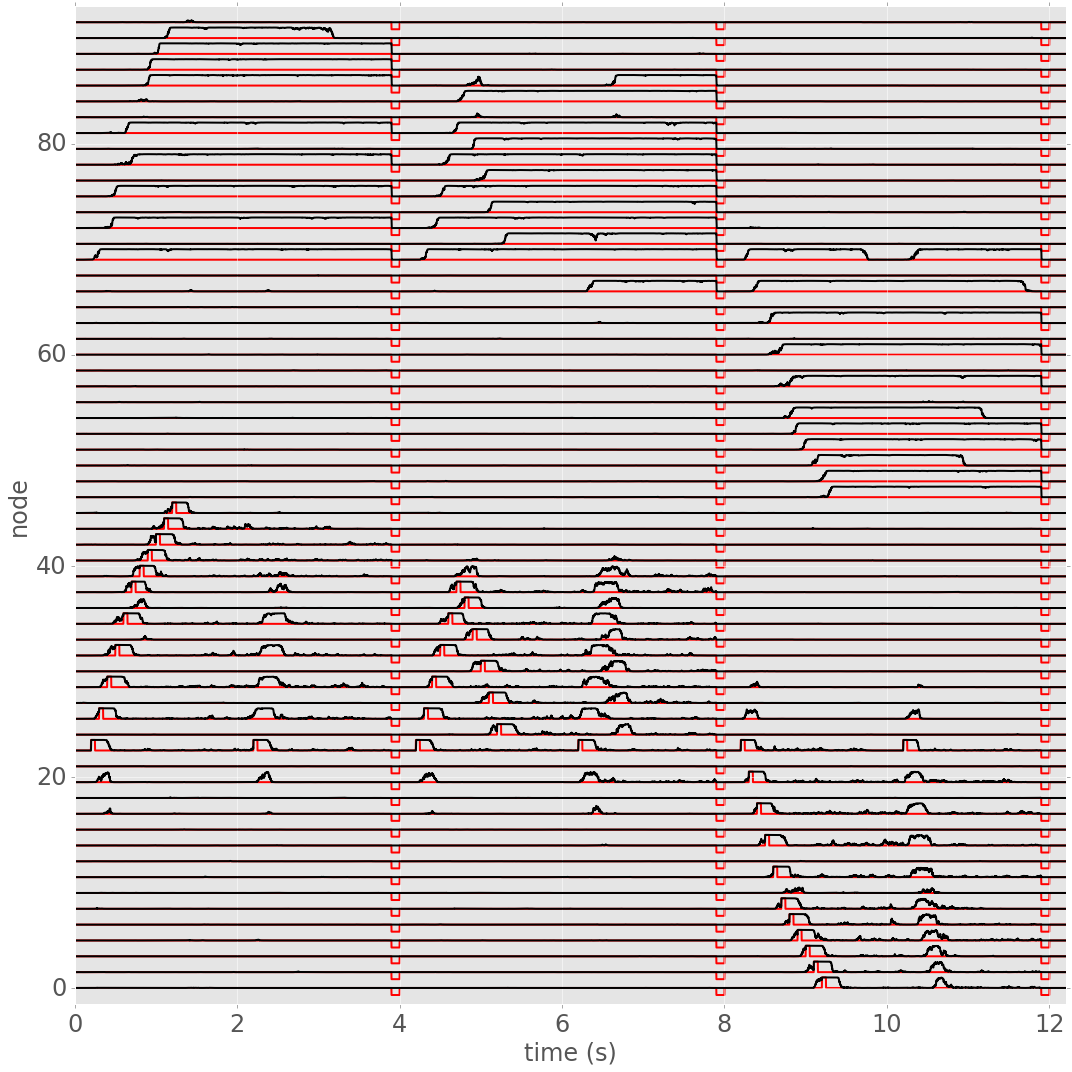

In [3]:
fig_1(
    SEED=0,
    TAU=0.05,
    V_REST=-0.07,
    V_TH=0.0,
    GAIN=100,
    NOISE=0.11,
    DT=0.001,
    BRANCH_LENGTH=5,
    W_PP=0.080,
    W_MP=0.05,
    W_PM=0.03,
    W_MM=0.12,
    DRIVE_START=0.2,
    PULSE_DURATION=0.05,
    INTER_PULSE_INTERVAL=0.1,
    PULSE_HEIGHT=1.5,
    BRANCH_ORDER=[0, 2, 1],
    INTER_TRAIN_INTERVAL=4,
    REPLAY_PULSE_START=2,
    RESET_PULSE_START=3.7,
    RESET_PULSE_DURATION=0.1,
    RESET_PULSE_HEIGHT=-1,
    FIG_SIZE=(15, 15),
    VERT_SPACING=1.5,
    FONT_SIZE=24,
)

#### Figure
Red = external drive. Black = node firing rate. An external drive sequence is presented to the network. Shortly after, only the first element of the external drive sequence is presented. This trigger causes the sequence to replay. The network is reset at ~ 4 s and the experiment is repeated with a different external drive sequence. Yet another sequence is presented after the network is reset at ~ 8 s. Notably, the external drive trigger is the same for all three sequences, so the network remembers which sequence occurred.

### Architecture of sequential replay network
The nodes whose activation replays are the "primary" nodes, labeled "P" in the diagram. Each primary node connects to one "memory" node. Each memory node is bistable, and sufficient activation of its corresponding primary node moves it to its "upstate". When a memory node is in its upstate, its primary node receives increased constant input, effectively increasing its baseline and moving it closer to threshold.

<img src="files/images/tree_structure_rate_based.png">

#### Diagram

### Analysis of memory node bistability
The bistability of the memory nodes (in the absence of input from the primary nodes) can be seen by plotting $dv/dt$ vs. $v$ for several different self-connection strengths $W_{self}$. Bistability occurs when $W_{self}$ is strong enough that there are two stable fixed points (downward zero crossings).

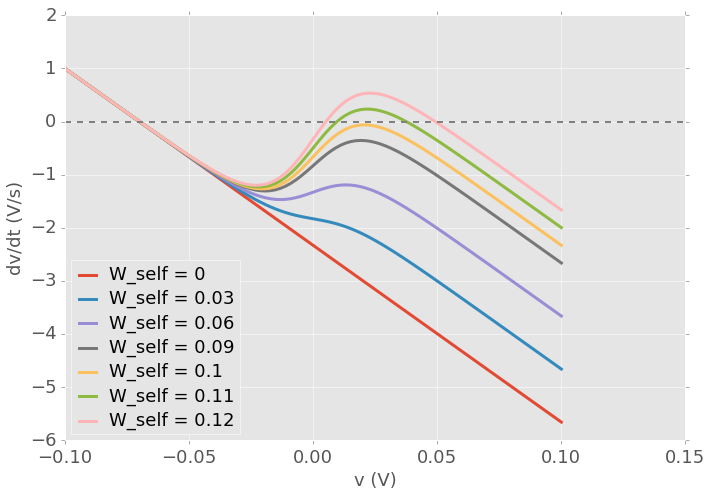

In [4]:
fig_s_2(
    VS=np.linspace(-.1, .1, 100),
    TAU=0.03,
    V_REST=-0.07,
    V_TH=0.0,
    GAIN=100,
    W_SELFS=[0, 0.03, 0.06, 0.09, 0.1, 0.11, 0.12],
    FIG_SIZE=(10, 7),
    FONT_SIZE=18,
)

### Analysis of threshold potential vs steady-state potentials

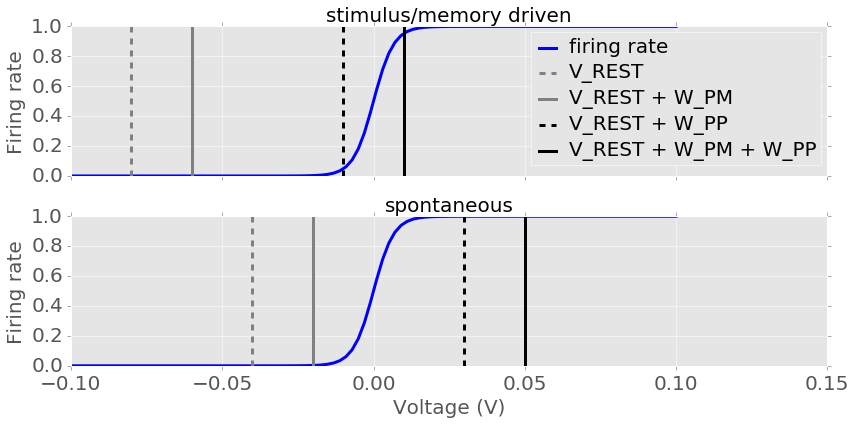

In [5]:
fig_s_3(
    VS=np.linspace(-.1, .1, 100),
    V_REST=-0.08,
    V_TH=0.0,
    GAIN=300,
    W_PM=0.02,
    W_PP=0.07,
    W_TOGGLE=0.04,
    FIG_SIZE=(12, 6),
    FONT_SIZE=20)